## Challenge 1 (1 point) -- Novice

Identify a loud binary black hole signal in white, Gaussian noise.

* Use the data file "challenge1.gwf".  The channel name is "H1:CHALLENGE1".
* The data are white, Gaussian noise containing a simulated BBH signal.

1. Load the data into memory.  What are the sampling rate and duration of the data?

2. Plot the data in the time-domain. 

3. Plot a spectrogram (or q-transform) of the data, and try to identify the signal.

4. What is the time of the merger?

In [1]:
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

--2023-05-24 04:52:12--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge1.gwf [following]
--2023-05-24 04:52:16--  https://gwosc.org/s/workshop3/challenge/challenge1.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf’

challenge1.gwf      100%[===================>]   3.84M   764KB/s    in 5.1s    

2023-05-24 04:52:22 (764 KB/s) - ‘challenge1.gwf’ saved [4025674/4025674]



In [14]:
from gwpy.timeseries import TimeSeries
import astropy.units as u
import matplotlib.pyplot as plt

strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

In [12]:
print("sample rate :", strain.sample_rate)
print("duration : ", strain.duration)

sample rate : 4096.0 Hz
duration :  128.0 s


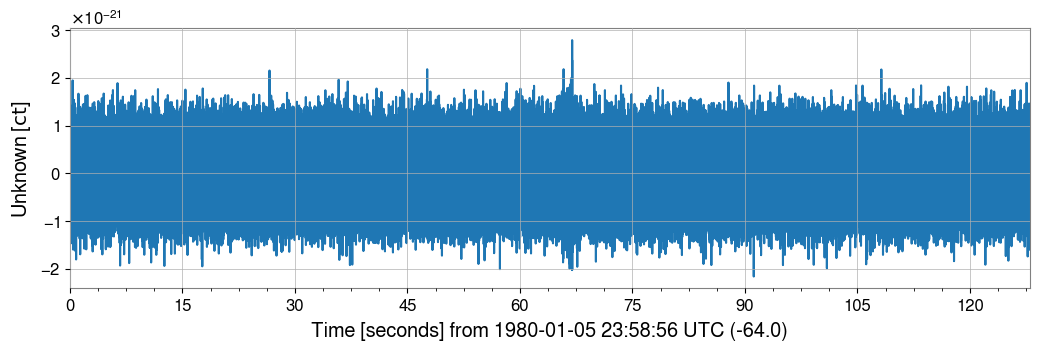

In [55]:
plot = strain.plot()
# ax = plot.gca()
# ax.set_epoch(0)

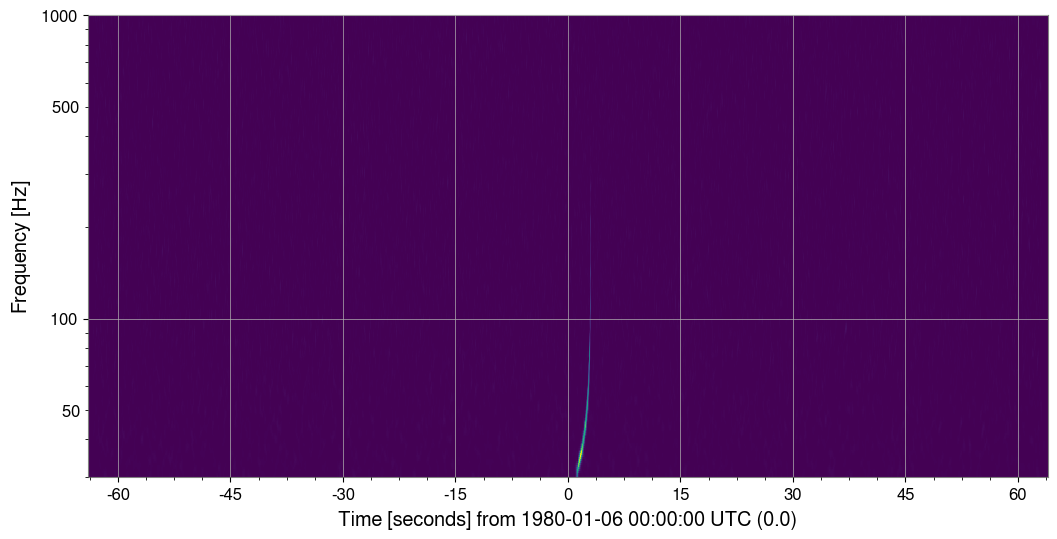

In [54]:
qplot = strain.q_transform(frange=[30,1000]).plot()
# qplot = strain.q_transform(frange=[30,1000], outseg=[-64+60, -64+75]).plot()
ax = qplot.gca()
ax.set_epoch(0)
ax.set_yscale("log")
plt.show()

In [27]:
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

In [29]:
pycbc_strain.sample_rate, pycbc_strain.duration

(4096.0, 128.0)

In [43]:
gps = pycbc_strain.start_time
gps

LIGOTimeGPS(-64, 0)

In [39]:
pycbc_strain.qtransform(logfsteps=2, frange=[30,1000])

(array([-64.        , -63.99975586, -63.99951172, ...,
         63.99926758,  63.99951172,  63.99975586]),
 array([  30., 1000.]),
 array([[2.51800981, 2.51674765, 2.51548672, ..., 2.52180351,
         2.52053774, 2.51927317],
        [1.29309236, 1.31957377, 1.34384755, ..., 1.20388323,
         1.23489109, 1.26474697]]))